Importing specific function from modules to prevent overloading

In [2]:
#Imports - using from * import notation to reduce load/memory
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from train_network import TrainNetwork
from test_network import TestNetwork
from preparation import Preparation
from create_network import CreateNetwork
import warnings

No idea why, local system issues and version control issues

In [3]:
#"Preventing" version and local systems issues
warnings.filterwarnings("ignore")
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

__init__ =
Collecting neural network architecture and test dataset

train_test =
Passing the model to be trained through the neural network and then testing it for validity

export_results =
printing results prettified to console

In [4]:
class Main:
    
    #Collecting test dataset and neural network
    def __init__(self):
        self.prep = Preparation()
        self.model = CreateNetwork()
        self.test_loader = self.prep.loading(get_value="test")

    #Adding test and training models to model
    def train_test(self):
        trained_network = TrainNetwork(self.model)
        self.model = trained_network.get_trained_model()
        tested_network = TestNetwork(self.model)
        self.model = tested_network.get_tested_model()

    #Function to export results from learning model with actual results
    def export_results(self):
        data_iter = iter(self.test_loader)
        images, labels = data_iter.next()
        output = self.model(images)
        _, preds = torch.max(output, 1)
        images = images.numpy()
        
        #Prettifying export
        fig = plt.figure(figsize=(25, 4))
        for idx in np.arange(20):
            ax = fig.add_subplot(2, 20 / 2, idx + 1, xticks=[], yticks=[])
            ax.imshow(np.squeeze(images[idx]), cmap='gray')
            ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                         color=("green" if preds[idx] == labels[idx] else "red"))

        plt.savefig("results\\results")

Main execution of entire AI work

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw

epoch: 0
epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9


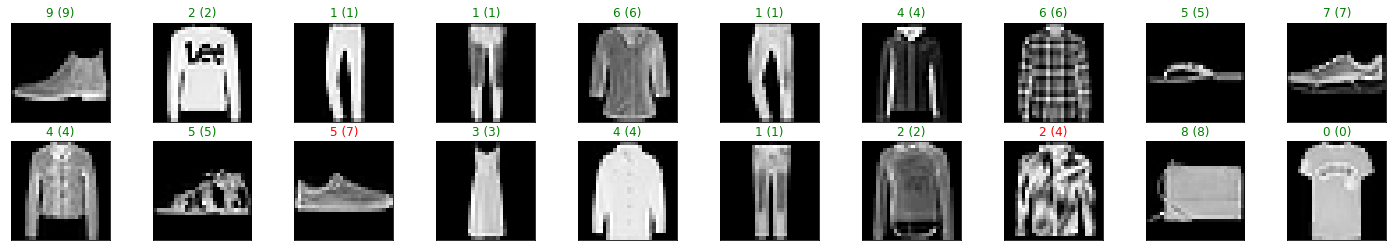

In [5]:
#Executing model training application
if __name__ == '__main__':
    main = Main()
    main.train_test()
    main.export_results()